# Clustering

<img align="right" style="padding-left:10px; height: 20%; width: 20%;" src="figures/raindrops.jpg">

* Clustering is the process of discovering categories of data in a multi-dimensional dataset. 
* There are several kinds of clustering possible, we study just one type. 
* *Agglomerative clustering* builds categories of data points based upon their distance from each other according to some metric.  It groups the two closest points, and continues doing this until the result is one big blob. One can then divide the data into any number of categories by dividing up the agglomeration. _Sort of like, after some rain, how raindrops coalesce!_
* Clustering is an example of *unsupervised learning*. There is no preconceived notion of the categories that should arise. Contrast with classification, where there _is_ a preconceived notion of the categories.

This code is adapted from: https://stackabuse.com/hierarchical-clustering-with-python-and-scikit-learn/

# First, let's input some 2-d data. 

In [20]:
import numpy as np

data = np.array([[5, 3],
                 [10, 15],
                 [70, 55],
                 [15, 12],
                 [71, 80],
                 [24, 10],
                 [30, 30],
                 [85, 70],
                 [60, 78],
                 [80, 91], ])
data

array([[ 5,  3],
       [10, 15],
       [70, 55],
       [15, 12],
       [71, 80],
       [24, 10],
       [30, 30],
       [85, 70],
       [60, 78],
       [80, 91]])

# Then let's label rows for a demo

* This is a trick to label points with characters
* `ord(character)` is the integer offset of `character` in ASCII. 
* `chr(integer)` is the character corresponding to the offset `integer`. 
* `chr(ord('a')+i)` is the `i`th character in the alphabet, starting at `i=0`. 

In [21]:
row_labels = [chr(c+ord('a')) for c in range(len(data))]
row_labels

['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']

# Let's put this into a DataFrame 

In [22]:
import pandas as pd
df = pd.DataFrame(data, index=row_labels, columns=('x', 'y'))
df

,x,y
a,5,3
b,10,15
c,70,55
d,15,12
e,71,80
f,24,10
g,30,30
h,85,70
i,60,78
j,80,91


# Caveat about pandas and numpy
* It is good to remember that `numpy` predates `pandas`. 
* Some libraries take only `numpy` input. 
* Others tolerate either `pandas` or `numpy` input. 
* In this case, we have libraries that tolerate both formats. 

# Let's visualize the data 

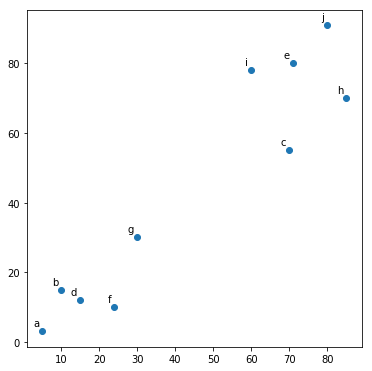

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))  # set size of overall figure
plt.subplots_adjust(bottom=0.1)  

# make a scatterplot of all data,
plt.scatter(df.loc[:,'x'],df.loc[:,'y'], label='True Position')

# label points with their letters for clarity. 
# use parallel iteration over three parallel lists 
for label, x, y in zip(df.index, df.loc[:, 'x'], df.loc[:, 'y']):  
    plt.annotate(
        label, # label of text
        xy=(x, y),  # where point is in coordinate space 
        xytext=(-3, 3),  # offset of label in pixels
        textcoords='offset points', # how to interpret coordinates 
        ha='right',  # text horizontal alignment
        va='bottom')  # text vertical alignment

# Some basic observations
* It's pretty obvious that this data is segregated into two categories. 
* It's not so obvious as to how to do this by machine. 
* The following is an illustration of one way to do it. 

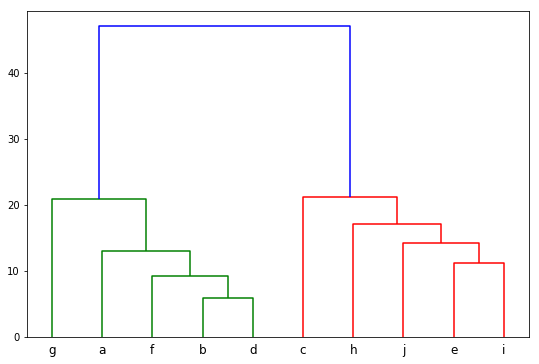

In [5]:
from scipy.cluster.hierarchy import dendrogram, linkage  
from matplotlib import pyplot as plt

# make a hierarchical structure from the data. 
linked = linkage(data, 'single')

# plot the hierarchy as a 'dendrogram' 
plt.figure(figsize=(9, 6))  
_ = dendrogram(linked,  
               orientation='top',
               labels=row_labels,
               distance_sort='descending',
               show_leaf_counts=True)

# Agglomerative clustering
The above diagram is made as follows: 
1. Start with nothing linked. Every point is in its own cluster. 
2. Link the two closest clusters to one another. The distance between clusters is the minimum distance between points in the cluster. 
3. Continue until you have one large cluster.  

We usually skip showing the previous diagram, and proceed as follows: 

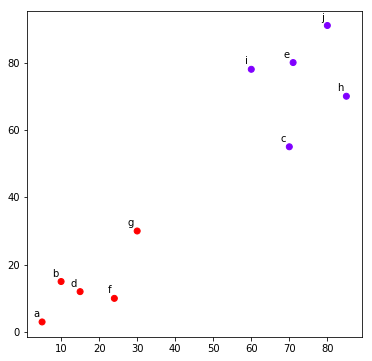

In [6]:
from sklearn.cluster import AgglomerativeClustering

# Compute clusters
cluster2 = AgglomerativeClustering(n_clusters=2, affinity='euclidean')
cluster2.fit_predict(df)

# color each cluster with a different color of the rainbow
plt.figure(figsize=(6, 6))
plt.scatter(df.loc[:, 'x'],  # x coordinate
            df.loc[:, 'y'],  # y coordinate
            c=cluster2.labels_,  # how to determine colors of points.
            cmap='rainbow')  # what color code to use

# Label data points with their letters
for label, x, y in zip(df.index, df.loc[:, 'x'], df.loc[:, 'y']):
    plt.annotate(
        label,  # what label to place
        xy=(x, y),  # where the point is (actual coordinates)
        xytext=(-3, 3),  # where the characters should start (pixels)
        textcoords='offset points',  # use the xytext offsets to place text
        ha='right',  # horizontal alignment of text
        va='bottom')  # vertical alignment of text

# How this was done
* in `plt.scatter`, change the color for each cluster: `c=cluster.labels_`
* Map each cluster to a color of the rainbow: `cmap='rainbow'`
        
Here's the same chart for _three clusters_.

In [7]:
cluster3 = AgglomerativeClustering(n_clusters=3, affinity='euclidean')  
cluster3.fit_predict(df)  

array([0, 0, 2, 0, 1, 0, 0, 2, 1, 1])

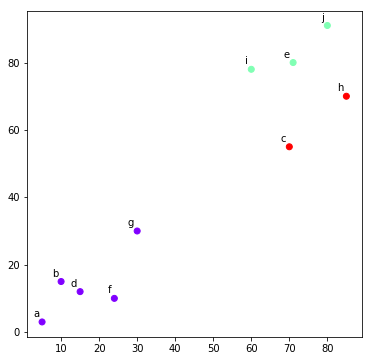

In [8]:
plt.figure(figsize=(6, 6))
plt.scatter(df.loc[:,'x'],df.loc[:,'y'], c=cluster3.labels_, cmap='rainbow')  
for label, x, y in zip(df.index, df.loc[:, 'x'], df.loc[:, 'y']):  
    plt.annotate(
        label,
        xy=(x, y), 
        xytext=(-3, 3),
        textcoords='offset points', 
        ha='right', 
        va='bottom')

# Data is often not so well behaved
* There can be more than two axes. 
* Clusters may not be separable. 
* Human-specified and data-driven categories need not match. 
* The reason is the scourge of the data scientist: *hidden variables*.

# Hidden variables
* Often, the human categorization of something differs from the machine categorization due to specialized knowledge. 
* No dataset is complete. 
* There are aspects that are not recorded. 
* These can determine categories that the data doesn't depict. 

# Let's try this out
* Here is a practical case study of hidden variables. 
* The Iris dataset doesn't in any sense contain everything about irises. 
* We can try clustering it, and compare that with the human categorization. 
* We'll get somewhat different results. 

In [24]:
# Don't change this cell; just run it. 
from client.api.notebook import Notebook
ok = Notebook('04-03-clustering.ok')

Assignment: Clustering
OK, version v1.14.15



In [25]:
from sklearn import datasets
iris = datasets.load_iris()
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

1. Call Agglomerative Clustering on the iris data, as above, with three categories. Put the result into the variable `cluster`. 

In [26]:
# Your answer: 
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean')  
cluster.fit_predict(iris.data)
cluster.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [27]:
_ = ok.grade('q01')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 2
    Failed: 0
[ooooooooook] 100.0% passed



Let's compare this with the expert decisions in `iris.target` 
Category numbers are arbitrary. You'll need to map between numbering systems to compare these. 

2. Compare the above output with `iris.target` to determine the closest match between category numbers. 
What category numbers in your map correspond to the ones in `iris.target`? 

___Your answer:___
* `iris.target` category 0 corresponds to `cluster.labels_` category 1.
* `iris.target` category 1 corresponds to `cluster.labels_` category 0.
* `iris.target` category 2 corresponds to `cluster.labels_` category 2.

This situation is very common. The two categorizations are slightly different. We want to know how close they can be matched to one another. This is a measure of how much information is hidden that we are not recording or using in clustering. 

3. Create an `array` `comparable` that maps categories you have listed above to their closest equivalents in `iris.target`. You can do this with a `for` loop or become more clever. 

In [28]:
# Your answer: 
import numpy as np
out = list()
for i in cluster.labels_: 
    if i == 1: 
        out.append(0)
    elif i==0: 
        out.append(1)
    else: 
        out.append(2)
comparable = np.array(out)
comparable

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

In [29]:
_ = ok.grade('q03')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 2
    Failed: 0
[ooooooooook] 100.0% passed



4. Compute the number of identical characterizations. Hint: use array comparison, and note that the sum of a Boolean vector is the number of True values. Put the result in `same`

In [30]:
# Your answer: 
same = (comparable == iris.target).sum()
same

134

It's important to understand that this isn't an error of clustering. Clustering acts on the data it gets. The problem is that something is missing. What is missing distinguishes two categories of `iris.target` more clearly. 

4. Which categories in `iris.target` are not clearly distinguished? 

___Your answer:___2

Well, we know something that's missing: the human categorization! Will adding that to the data fix the clustering? Let's try it as an educational exercise. 

5. Run the same experiment on the array created by combining `iris.data` and `iris.target` so that we have five columns of input data. Print the number of differences 

In [31]:
# Your answer: 
newdata = np.insert(iris.data,4,iris.target, axis=1)
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean')  
cluster.fit_predict(newdata)
out = list()
for i in cluster.labels_: 
    if i == 1: 
        out.append(0)
    elif i==2: 
        out.append(1)
    else: 
        out.append(2)
cats = np.array(out)
same = (cats == iris.target).sum()
same

150

The moral of this story is that no clustering mechanism is perfect, and no clustering mechanism truly substitutes for human categorization. Clustering mechanisms can get close, but are never completely accurate. The last experiment begs the question. 

# When you are done with this notebook, 

* Save and checkpoint. 
* Ensure that the name of this file is precisely `04-03-clustering.ipynb`. 
* Save and checkpoint the notebook. 


* If your Jupyter installation can download the notebook as a PDF,
    * (File >> Download as >> PDF via LaTeX (.pdf)), 
    * Rename the downloaded file to `<loginid>-04-03-clustering.pdf`. In other words, my filename would be `jsingh11-04-03-clustering.pdf`.
    * Submit the file `<loginid>-04-03-clustering.pdf` to Canvas.
* Otherwise 
    * (File >> Download as >> Notebook (.ipynb)). In other words, my filename would be `jsingh11-04-03-clustering.ipynb`.
    * Rename the downloaded file to `<loginid>-04-03-clustering.ipynb`,
    * Submit the file `<loginid>-04-03-clustering.ipynb` to Canvas.